In [ ]:
!pip install -r "/content/drive/MyDrive/Colab Notebooks/LEVX_1km/requirements.txt"

In [ ]:
!pip install lazypredict

In [2]:
import plotly.express as px
import pandas as pd
import numpy as np
coor=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_1km/input_files/distan_lat42.22lon-8.63p2R1Km.csv")
px.set_mapbox_access_token("pk.eyJ1IjoiZ3JhbmFudHVpbiIsImEiOiJja3B4dGU4OTkwMTFmMm9ycnNhMjJvaGJqIn0.VWzx_PkD9A5cSUVsn_ijCA")
px.scatter_mapbox(coor, hover_data=['distance'],lat='lat', lon='lon',color='distance', title="Nearest points",
                           color_continuous_scale=px.colors.cyclical.IceFire,)

In [3]:
station = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_1km/input_files/LEVX_20192020.csv",
                          usecols =["time","wxcodes_o"],
                          parse_dates=["time"]).dropna().set_index("time")

pd.options.display.max_rows = 999
station["wxcodes_o"].value_counts(normalize=True).map(lambda n: '{:.1%}'.format(n))

M              74.1%
BCFG            7.0%
FG              3.6%
-RA             2.1%
BR              1.5%
RA              1.2%
-RA BCFG        1.0%
RA BCFG         0.7%
BCFG -RA        0.7%
-RA BR          0.6%
RA FG           0.6%
-RA FG          0.6%
RA BR           0.5%
BCFG RA         0.5%
SHRA            0.4%
-DZ             0.3%
VCFG            0.3%
FG DZ           0.3%
FG -RA          0.3%
BCFG -DZ        0.2%
DZ              0.2%
FG RA           0.2%
-DZ FG          0.2%
FG -DZ          0.2%
DZ BCFG         0.2%
+RA FG          0.2%
DZ FG           0.2%
BCFG DZ         0.1%
DZ BR           0.1%
-DZ BCFG        0.1%
-RADZ BCFG      0.1%
-DZ BR          0.1%
+RA BCFG        0.1%
-RADZ           0.1%
+DZ FG          0.1%
-SHRA           0.1%
-RADZ BR        0.1%
+SHRA           0.1%
+RA BR          0.1%
BR RA           0.1%
+RA             0.1%
TS              0.1%
BR -DZ          0.1%
-RADZ FG        0.1%
FG -RADZ        0.1%
BR -RA          0.0%
SHRA BCFG       0.0%
+DZ BR       

In [4]:
#label RA/DZ

station["prec_l"] = "No RA/DZ"
mask = station['wxcodes_o'].str.contains("RA")
station.loc[mask,["prec_l"]] = "RA/DZ"
mask = station['wxcodes_o'].str.contains("DZ")
station.loc[mask,["prec_l"]] = "RA/DZ"

print(station.sample(100))
print("*****************************")
station["prec_l"].value_counts(normalize=True)

                      wxcodes_o    prec_l
time                                     
2020-09-02 12:00:00           M  No RA/DZ
2020-05-16 14:00:00           M  No RA/DZ
2019-04-20 00:00:00           M  No RA/DZ
2020-09-20 22:00:00           M  No RA/DZ
2020-07-22 13:00:00           M  No RA/DZ
2019-09-29 03:00:00           M  No RA/DZ
2019-01-13 12:30:00           M  No RA/DZ
2020-02-27 10:00:00        BCFG  No RA/DZ
2018-10-14 12:30:00           M  No RA/DZ
2019-11-29 00:30:00           M  No RA/DZ
2019-08-11 04:00:00           M  No RA/DZ
2018-11-13 00:30:00        BCFG  No RA/DZ
2020-08-22 04:00:00           M  No RA/DZ
2018-10-15 07:30:00      -RA FG     RA/DZ
2019-05-21 08:30:00           M  No RA/DZ
2020-03-20 12:00:00          BR  No RA/DZ
2019-05-29 20:30:00           M  No RA/DZ
2020-01-04 19:30:00           M  No RA/DZ
2019-11-24 17:30:00     BCFG RA     RA/DZ
2018-12-13 01:30:00          RA     RA/DZ
2019-02-07 09:30:00          FG  No RA/DZ
2019-11-11 15:00:00           M  N

No RA/DZ    0.867321
RA/DZ       0.132679
Name: prec_l, dtype: float64

**Forecast D1**

In [5]:
#ria forecast d0
model1k = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_1km/input_files/lat42.22lon-8.63p2R1KmD1.csv",parse_dates=["time"]).set_index("time")

model1k

,Unnamed: 0,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,...,cape1,cin1,cfh1,cfl1,cfm1,cft1,HGT5001,HGT8501,T5001,T8501
time,,,,,,,,,,,,,,,,,,,,,
2019-01-02 00:00:00,0,325.189301,0.0,1740.084961,1.217145,2.264327,103401.195312,280.789246,0.781950,24135.000000,...,0.000000,0.000000e+00,0.142531,0.000000,0.0,0.142531,5735.675293,1613.937378,253.634506,281.908569
2019-01-02 01:00:00,1,333.670044,0.0,1731.173340,1.369249,2.540694,103382.539062,280.565735,0.778615,24135.000000,...,0.000000,0.000000e+00,0.112280,0.000000,0.0,0.112280,5732.622559,1611.490601,253.512878,281.793762
2019-01-02 02:00:00,2,351.552429,0.0,1721.331055,1.275996,2.367275,103355.875000,280.324890,0.790180,24135.000000,...,0.000000,-8.593750e-07,0.061034,0.000000,0.0,0.061034,5730.169434,1609.190552,253.402405,281.787689
2019-01-02 03:00:00,3,33.307388,0.0,1717.657593,0.696653,1.317065,103329.765625,280.101318,0.786697,24135.000000,...,0.000000,0.000000e+00,0.065096,0.000000,0.0,0.065096,5728.023926,1606.675903,253.443604,281.926819
2019-01-02 04:00:00,4,164.234100,0.0,1696.665771,0.224833,0.409460,103310.062500,279.779572,0.795685,24135.000000,...,0.000000,-2.343750e-09,0.085678,0.000000,0.0,0.085678,5725.899414,1604.329346,253.527298,281.808014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-01 19:00:00,17491,297.835388,0.0,766.453003,6.263795,12.470805,101635.929688,279.777435,0.867834,24042.130859,...,99.540001,-7.467773e+00,0.000000,0.000000,0.0,0.000000,5371.030273,1446.678223,240.972382,271.724701
2021-01-01 20:00:00,17492,305.522644,0.0,769.984497,5.884632,12.509005,101664.109375,279.636444,0.861618,24046.214844,...,37.480000,-6.560820e+00,0.000000,0.077832,0.0,0.077832,5373.912109,1448.029297,241.139252,271.784821
2021-01-01 21:00:00,17493,304.144806,0.0,787.868713,6.053614,12.777985,101677.812500,279.624115,0.851240,24053.814453,...,25.900000,-1.712590e+01,0.000000,0.097343,0.0,0.097343,5376.250977,1449.369507,241.217819,271.922638


In [6]:
#concat station model
df_all1k = pd.concat([station,model1k],axis=1).drop(columns=["wxcodes_o","Unnamed: 0"]).dropna()
df_all1k.sample(100)

,prec_l,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,...,cape1,cin1,cfh1,cfl1,cfm1,cft1,HGT5001,HGT8501,T5001,T8501
time,,,,,,,,,,,,,,,,,,,,,
2019-01-31 05:00:00,RA/DZ,264.939087,0.0,1508.425293,8.976803,15.647787,100065.546875,284.862915,0.999828,27.638596,...,22.940001,-3.480535e+00,0.000000,0.867158,0.900000,0.900000,5423.728027,1377.940552,254.500809,279.389313
2019-07-15 17:00:00,No RA/DZ,277.478729,0.0,2905.894043,4.487010,5.703970,101554.195312,296.807434,0.610519,24056.214844,...,0.000000,4.101562e-03,0.000000,0.000000,0.000000,0.000000,5754.977539,1525.086426,262.889374,289.301636
2019-04-05 08:00:00,No RA/DZ,158.635590,0.0,466.864532,5.095808,11.022601,99438.265625,279.391815,0.934902,24051.390625,...,0.000000,-5.078125e-04,0.100000,0.532904,0.100000,0.532904,5231.092773,1289.431641,243.639496,273.485382
2020-08-01 05:00:00,No RA/DZ,312.078827,0.0,2893.091309,1.521074,1.986170,102105.203125,290.137787,0.996841,32.323540,...,4.861000,-4.853125e-02,0.000000,0.437815,0.000000,0.437815,5785.859375,1539.402710,264.468384,286.876190
2020-02-07 14:00:00,No RA/DZ,222.572815,0.0,1639.325439,5.751590,8.292318,102136.882812,285.887207,0.922228,17832.900391,...,37.414001,2.695312e-04,0.000000,0.600000,0.000000,0.600000,5610.070312,1507.445557,253.452255,277.847809
2020-10-07 18:00:00,No RA/DZ,282.214081,0.0,2799.922607,3.232531,4.230029,102476.429688,288.931885,0.985929,24231.107422,...,0.000000,4.531250e-04,0.127114,0.000000,0.000000,0.127114,5802.315430,1562.851562,265.089264,285.331696
2020-04-19 00:00:00,No RA/DZ,327.425232,0.0,1513.316772,1.210016,2.380262,101513.750000,281.124634,1.000000,24234.460938,...,6.170000,-1.075680e+02,0.035347,0.051484,0.030814,0.051484,5505.855957,1467.782227,249.172882,278.448242
2019-11-15 01:00:00,No RA/DZ,329.658600,0.0,707.341003,7.017418,15.186607,100884.757812,280.464752,0.843963,24054.279297,...,95.540001,-9.759805e+00,0.000000,0.045400,0.000000,0.045400,5328.585449,1412.314941,242.602493,272.500824
2019-11-02 07:00:00,No RA/DZ,259.255768,0.0,1963.903809,4.414182,7.525937,101036.914062,287.185608,0.964030,24035.597656,...,88.699997,6.875000e-04,0.600000,0.361228,0.200000,0.600000,5553.770996,1446.269775,257.122620,279.950134


**Meteorological model score**

In [11]:
# HSS in 20 samples

y_pred = np.asarray(["RA/DZ" if c>0 else "No RA/DZ" for c in df_all1k.prec0])
concat = pd.DataFrame({"y_pred":y_pred, "prec_l":df_all1k.prec_l})
HSS_met = []
for t in range (0,20):
  #sample lenght as y_test machine learning
  concat_t = concat.sample(3432)
  cm = pd.crosstab(concat_t.prec_l,concat_t.y_pred ,margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS_met.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS_met[t],2))

print(pd.DataFrame(HSS_met,columns=["HSS"]).describe())  
print("\nHSS list:") 
hss_d1 = np.around(HSS_met, decimals=2)
hss_d1

y_pred    No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      2733    311  3044
RA/DZ          163    225   388
All           2896    536  3432
Heidke Skill Score: 0.41
y_pred    No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      2690    352  3042
RA/DZ          144    246   390
All           2834    598  3432
Heidke Skill Score: 0.42
y_pred    No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      2696    340  3036
RA/DZ          161    235   396
All           2857    575  3432
Heidke Skill Score: 0.4
y_pred    No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      2695    347  3042
RA/DZ          159    231   390
All           2854    578  3432
Heidke Skill Score: 0.4
y_pred    No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      2698    348  3046
RA/DZ          155    231   386
All           2853    579  3432
Heidke Skill Score: 0.4
y_pred    No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      

array([0.41, 0.42, 0.4 , 0.4 , 0.4 , 0.43, 0.36, 0.4 , 0.41, 0.44, 0.42,
       0.42, 0.39, 0.38, 0.38, 0.42, 0.41, 0.39, 0.4 , 0.44])

In [8]:
# Global HSS

y_pred = np.asarray(["RA/DZ" if c>0 else "No RA/DZ" for c in df_all1k.prec0])
cm = pd.crosstab(df_all1k.prec_l, y_pred,margins=True,)
print(cm)
a = cm.values[0,0]
b = cm.values[1,0]
c = cm.values[0,1]
d = cm.values[1,1]
HSS = 2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d))
print("Heidke Skill Score:",round(HSS,2))

col_0     No RA/DZ  RA/DZ    All
prec_l                          
No RA/DZ     13449   1743  15192
RA/DZ          774   1194   1968
All          14223   2937  17160
Heidke Skill Score: 0.41


In [10]:
#Chi square test

from scipy import stats
from scipy.stats import chi2

y_pred = np.asarray(["RA/DZ" if c>0 else "No RA/DZ" for c in df_all1k.prec0])
concat = pd.DataFrame({"y_pred":y_pred, "prec_l":df_all1k.prec_l})

dataset_table = pd.crosstab(concat['y_pred'],concat['prec_l'])
print(dataset_table)

val = stats.chi2_contingency(dataset_table)
Expected_Values = val[3]

print("\n Expected_Values:",Expected_Values)

no_of_rows=len(dataset_table.iloc[0:2,0])
no_of_columns=len(dataset_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("\n Degree of Freedom:-",ddof)
alpha = 0.05

chi_square = sum([(o-e)**2./e for o,e in zip(dataset_table.values ,Expected_Values)])
chi_square_statistic = chi_square[0]+chi_square[1]

print("chi-square statistic:",chi_square_statistic)

critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)

#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('p-value:',p_value)

if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")


prec_l    No RA/DZ  RA/DZ
y_pred                   
No RA/DZ     13449    774
RA/DZ         1743   1194

 Expected_Values: [[12591.83076923  1631.16923077]
 [ 2600.16923077   336.83076923]]

 Degree of Freedom:- 1
chi-square statistic: 2972.6911780629835
critical_value: 3.841458820694124
p-value: 0.0
Significance level:  0.05
Degree of Freedom:  1
p-value: 0.0
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


**Compare HSS d0 vs HSS d1**

In [14]:
#t test compare hss d0 vs hss d1

# hss_d0 from prec_LEVX_1km_time_d0.ipynb

hss_d0 = np.array([0.46, 0.48, 0.48, 0.47, 0.44, 0.47, 0.43, 0.47, 0.45, 0.43, 0.47,
       0.47, 0.47, 0.51, 0.46, 0.46, 0.47, 0.46, 0.45, 0.44])

"""

hss_d1 = array([0.41, 0.42, 0.4 , 0.4 , 0.4 , 0.43, 0.36, 0.4 , 0.41, 0.44, 0.42,
       0.42, 0.39, 0.38, 0.38, 0.42, 0.41, 0.39, 0.4 , 0.44])
"""       

#Null Hypothesis H0 mean hss_d1=mean2 hssd0

_,p_value=stats.ttest_ind(hss_d0,hss_d1,equal_var= True)

print("p_value:",p_value)
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print("we are rejecting null hypothesis H0 mean hss_d1=mean hss_d0 ")
else:
    print("we are accepting null hypothesis  H0 mean hss_d1=mean hss_d0")

p_value: 5.3058439546492355e-11
we are rejecting null hypothesis H0 mean hss_d1=mean hss_d0 


**Find best Machine learning model from Lazy predict**

In [ ]:
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyClassifier

# X and Y
Y = df_all1k.prec_l
X = df_all1k.iloc[:,1:]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )


multiple_model = LazyClassifier(verbose =0, ignore_warnings = True,predictions=True)
models,predictions = multiple_model.fit(X_train,X_test,y_train,y_test)


100%|██████████| 29/29 [01:22<00:00,  2.83s/it]


In [ ]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
GaussianNB,0.80,0.82,None,0.83,0.12
NearestCentroid,0.83,0.82,None,0.85,0.18
BernoulliNB,0.82,0.81,None,0.85,0.21
LabelSpreading,0.90,0.74,None,0.90,16.62
LabelPropagation,0.90,0.74,None,0.90,11.50
LinearDiscriminantAnalysis,0.90,0.72,None,0.90,0.44
LGBMClassifier,0.91,0.72,None,0.91,1.31
ExtraTreesClassifier,0.92,0.71,None,0.91,1.89
AdaBoostClassifier,0.91,0.71,None,0.90,5.01


**ML LGBMClassifier**


Matriz de Confusión  (Machine Learning)

col_0     No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      2833    205  3038
RA/DZ          153    241   394
All           2986    446  3432
Heidke Skill Score: 0.51

Informe de calidad desagregado (Machine Learning)

              precision    recall  f1-score      support
No RA/DZ       0.948761  0.932521  0.940571  3038.000000
RA/DZ          0.540359  0.611675  0.573810   394.000000
accuracy       0.895688  0.895688  0.895688     0.895688
macro avg      0.744560  0.772098  0.757190  3432.000000
weighted avg   0.901876  0.895688  0.898466  3432.000000

Matriz de Confusión  (Machine Learning)

col_0     No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      2799    248  3047
RA/DZ          140    245   385
All           2939    493  3432
Heidke Skill Score: 0.49

Informe de calidad desagregado (Machine Learning)

              precision    recall  f1-score      support
No RA/DZ       0.952365  0.918608  0.935182

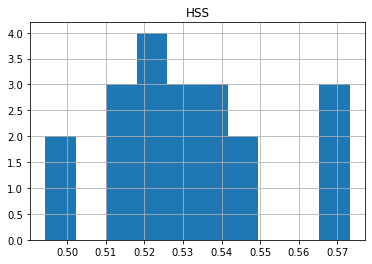

In [16]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro

#select x variables
#x_var = df_all1k.drop(columns=["Unnamed: 0","wxcodes_o","brfg_l"]).columns.to_list()  

# X and Y
Y = df_all1k.prec_l
X = df_all1k.iloc[:,1:]

# loop random
HSS_ml = []
for t in range (0,20):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  ml_model=LGBMClassifier(n_estimators=200).fit(X_res,y_res)

  #Confussion matrix

  print("\nMatriz de Confusión  (Machine Learning)\n")

  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS_ml.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS_ml[t],2))

  #quality report

  print("\nInforme de calidad desagregado (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nEstadísticas HSS")
# if p-value is lower than 5%, we can reject the null hypothesis of the normality of the dataset
#sample less 5000
print(pd.DataFrame(HSS_ml,columns=["HSS"]).describe())

print(shapiro(HSS_ml))
pd.DataFrame(HSS_ml,columns=["HSS"]).hist();

**Two-sample T test meteorological model vs machine learning**

In [17]:
import scipy.stats as stats

#Null Hypothesis H0 mean1=mean2

_,p_value=stats.ttest_ind(HSS_met,HSS_ml,equal_var= True)

print("p_value:",p_value)
if p_value < 0.05:    # p value is 0.05 or 5%
    print("we are rejecting null hypothesis  H0 HHS met = HSS ml")
else:
    print("we are accepting null hypothesis  H0 HHS met = HSS ml")

p_value: 2.9951082325893373e-21
we are rejecting null hypothesis  H0 HHS met = HSS ml


**Add time features**

In [18]:
df_all1k["hour"] = df_all1k.index.hour
df_all1k["month"] = df_all1k.index.month
df_all1k["dayofyear"] = df_all1k.index.dayofyear
df_all1k["weekofyear"] = df_all1k.index.weekofyear

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning:

weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)



In [ ]:

# X and Y
Y = df_all1k.prec_l
X = df_all1k.iloc[:,1:]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )


multiple_model = LazyClassifier(verbose =0, ignore_warnings = True,predictions=True)
models,predictions = multiple_model.fit(X_train,X_test,y_train,y_test)
models

100%|██████████| 29/29 [01:19<00:00,  2.74s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
GaussianNB,0.83,0.84,None,0.86,0.22
QuadraticDiscriminantAnalysis,0.85,0.83,None,0.87,0.74
NearestCentroid,0.84,0.83,None,0.86,0.51
BernoulliNB,0.83,0.82,None,0.85,0.22
SGDClassifier,0.88,0.80,None,0.89,0.43
Perceptron,0.88,0.76,None,0.89,0.31
LabelSpreading,0.90,0.75,None,0.90,13.35
LabelPropagation,0.90,0.75,None,0.90,10.07
LGBMClassifier,0.92,0.75,None,0.92,1.51



Matriz de Confusión  (Machine Learning)

col_0     No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      2861    191  3052
RA/DZ          140    240   380
All           3001    431  3432
Heidke Skill Score: 0.54

Informe de calidad desagregado (Machine Learning)

              precision    recall  f1-score      support
No RA/DZ       0.953349  0.937418  0.945316  3052.000000
RA/DZ          0.556845  0.631579  0.591862   380.000000
accuracy       0.903555  0.903555  0.903555     0.903555
macro avg      0.755097  0.784499  0.768589  3432.000000
weighted avg   0.909447  0.903555  0.906181  3432.000000

Matriz de Confusión  (Machine Learning)

col_0     No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      2814    192  3006
RA/DZ          166    260   426
All           2980    452  3432
Heidke Skill Score: 0.53

Informe de calidad desagregado (Machine Learning)

              precision    recall  f1-score      support
No RA/DZ       0.944295  0.936128  0.940194

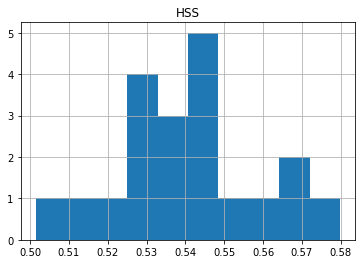

In [19]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro

#select x variables
#x_var = df_all1k.drop(columns=["Unnamed: 0","wxcodes_o","brfg_l"]).columns.to_list()  

# X and Y
Y = df_all1k.prec_l
X = df_all1k.iloc[:,1:]

# loop ranadom
HSS_t = []
for t in range (0,20):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  ml_model=LGBMClassifier(n_estimators=200).fit(X_res,y_res)

  #Confussion matrix

  print("\nMatriz de Confusión  (Machine Learning)\n")

  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS_t.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS_t[t],2))

  #quality report

  print("\nInforme de calidad desagregado (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nEstadísticas HSS")
# if p-value is lower than 5%, we can reject the null hypothesis of the normality of the dataset
#sample less 5000
print(pd.DataFrame(HSS_t,columns=["HSS"]).describe())

print(shapiro(HSS_t))
pd.DataFrame(HSS_t,columns=["HSS"]).hist();


**Two-sample T test compare machine learning with or without time features**

In [20]:
#Null Hypothesis H0 mean1=mean2

_,p_value=stats.ttest_ind(HSS_t,HSS_ml,equal_var=False)

print("p_value:",p_value)
if p_value < 0.05:    # p value is 0.05 or 5%
    print("we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

p_value: 0.1283781248996029
we are accepting null hypothesis


In [ ]:
import pickle
from sklearn.pipeline import Pipeline

estimators = [('ml_model', ml_model)]
pipe = Pipeline(estimators)
print(pipe)
al_file={"x_var":X.columns,"coor":coor,"pipe":pipe}
pickle.dump(al_file, open("prec_LEVX_1km_time_d1.al", 'wb'))

Pipeline(steps=[('ml_model', LGBMClassifier(n_estimators=200))])


In [ ]:
import sklearn
print(sklearn.__version__)

0.24.1


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report


# X and Y
Y = df_all1k.prec_l
X = df_all1k.iloc[:,1:]


# loop random
HSS = []
for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  ml_model = ExtraTreesClassifier(n_estimators=150).fit(X_res,y_res)

  #Confussion matrix

  print("\nMatriz de Confusión  (Machine Learning)\n")

  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS[t],2))

  #quality report

  print("\nInforme de calidad desagregado (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nEstadiísticas HSS")
pd.DataFrame(HSS,columns=["HSS"]).describe()


Matriz de Confusión  (Machine Learning)

col_0     No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      2139    151  2290
RA/DZ           83    201   284
All           2222    352  2574
Heidke Skill Score: 0.58

Informe de calidad desagregado (Machine Learning)

              precision    recall  f1-score      support
No RA/DZ       0.962646  0.934061  0.948138  2290.000000
RA/DZ          0.571023  0.707746  0.632075   284.000000
accuracy       0.909091  0.909091  0.909091     0.909091
macro avg      0.766834  0.820904  0.790107  2574.000000
weighted avg   0.919437  0.909091  0.913266  2574.000000

Matriz de Confusión  (Machine Learning)

col_0     No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      2095    163  2258
RA/DZ           86    230   316
All           2181    393  2574
Heidke Skill Score: 0.59

Informe de calidad desagregado (Machine Learning)

              precision    recall  f1-score      support
No RA/DZ       0.960569  0.927812  0.943906

,HSS
count,10.000000
mean,0.597154
std,0.027708
min,0.549723
25%,0.582586
50%,0.596526
75%,0.621155
max,0.636030
